In [1]:
import pandas as pd


# GitHub raw file URL(Using latest extended dataset)
github_url = 'https://raw.githubusercontent.com/Redback-Operations/redback-fit-sports-performance/main/Cycling%20Analysis/data/extended_activities_TRI001.csv'


In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(github_url)

# Display basic information about the dataset
print(df.info())

# Display descriptive statistics for numerical columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity ID                561 non-null    int64  
 1   Activity Date              561 non-null    object 
 2   Activity Name              561 non-null    object 
 3   Activity Type              561 non-null    object 
 4   Elapsed Time               561 non-null    int64  
 5   Max Heart Rate             466 non-null    float64
 6   Relative Effort            466 non-null    float64
 7   Commute                    561 non-null    bool   
 8   Activity Gear              162 non-null    object 
 9   Filename                   561 non-null    object 
 10  Athlete Weight             71 non-null     float64
 11  Bike Weight                162 non-null    float64
 12  Moving Time                561 non-null    float64
 13  Distance                   561 non-null    float64

In [3]:
# Filter the DataFrame to include only rows where 'Activity Type' is 'Run'
df_run = df[df['Activity Type'] == 'Run']

In [4]:
# Check for NaN values
nan_count = df_run.isna().sum()
print("Number of NaN values in each column:")
print(nan_count[nan_count > 0])


Number of NaN values in each column:
Activity Gear                164
Athlete Weight               164
Bike Weight                  164
Elevation Loss                 1
Elevation Low                  1
Elevation High                 1
Average Temperature          155
Total Work                   147
Perceived Exertion           164
Prefer Perceived Exertion    164
Perceived Relative Effort    164
Grade Adjusted Distance        1
Bike                         164
Total Steps                  156
dtype: int64


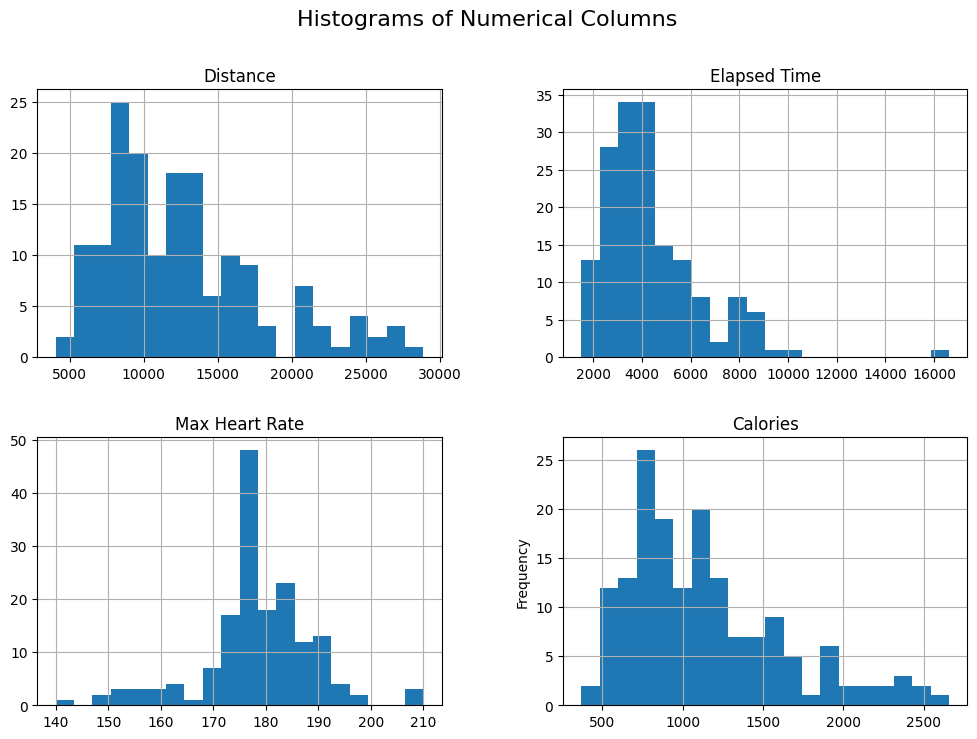

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn' To ignore warning SettingWithCopyWarning

num_cols = ['Distance', 'Elapsed Time', 'Max Heart Rate', 'Calories']
df_run[num_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.ylabel('Frequency')
plt.show()



*   In this context, the predominant range for distance covered during running sessions typically falls between 6 to 15 kilometers.
*   The most frequent elapsed time range was about 3000 to 5000 seconds.
*   The most common maximum heart rate range observed was between 175 and 183 beats per minute (bpm).
*   The typical range for calories burned observed was between 700 and 1100.





In [6]:
# Calculate the average heart rate
average_heart_rate = df_run['Average Heart Rate'].mean()

# Print the average heart rate
print("The Average Heart Rate:", average_heart_rate)

The Average Heart Rate: 157.00102122237044


**VO2 Max:** VO2 max is a measure of the maximum amount of oxygen that you use during intense physical activity. Below is the formula to calulate VO2 max,
VO2 max = 15 x (HRmax/HRrest). Assuming HRrest is 80 bpm in this case. Heart rate is considered normal if the rate is between 60 and 100 beats per minute so taking the average of it is 80 bpm.

In [7]:
# Define the resting heart rate
resting_heart_rate = 80  # Assuming resting heart rate is 80 bpm

# Calculate VO2 max using the formula
df_run['VO2_max_estimate'] = 15 * (df_run['Max Heart Rate'] / resting_heart_rate)

# Print the first few rows to verify the calculation
print(df_run[['Max Heart Rate', 'VO2_max_estimate']].head())

     Max Heart Rate  VO2_max_estimate
305           178.0           33.3750
306           173.0           32.4375
307           182.0           34.1250
308           188.0           35.2500
309           184.0           34.5000


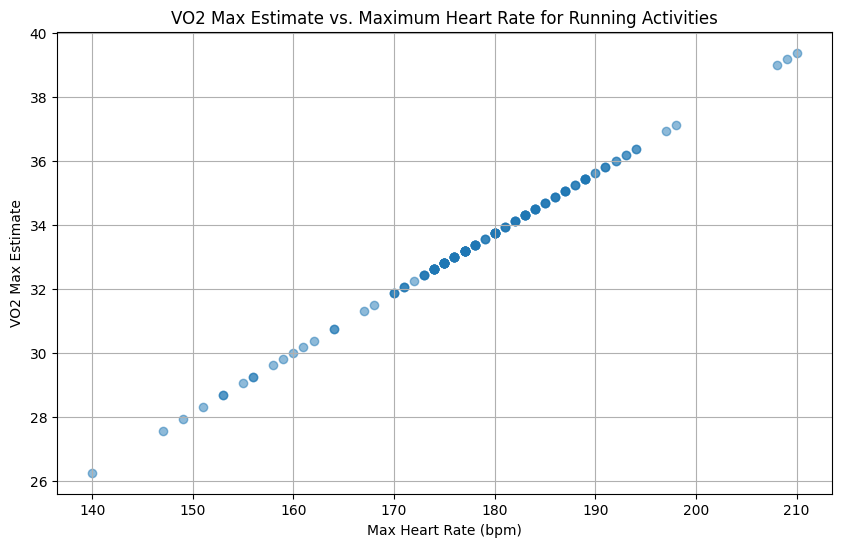

In [8]:
import matplotlib.pyplot as plt

# Plot VO2 max estimates against maximum heart rates for running activities
plt.figure(figsize=(10, 6))
plt.scatter(df_run['Max Heart Rate'], df_run['VO2_max_estimate'], alpha=0.5)
plt.title('VO2 Max Estimate vs. Maximum Heart Rate for Running Activities')
plt.xlabel('Max Heart Rate (bpm)')
plt.ylabel('VO2 Max Estimate')
plt.grid(True)
plt.show()



*  The scatter plot VO2 max estimates against maximum heart rates appears there may be a linear relationship between these two variables. In other words, there could be a trend where higher maximum heart rates correspond to higher VO2 max estimates, or vice versa.




In [9]:
import pandas as pd

# Calculate pace (time per unit distance) for each activity
# Assuming Elapsed Time is in seconds and Distance is in kilometers
df_run['Pace_min_km'] = df_run['Elapsed Time'] / (df_run['Distance'] * 60)  # Pace in minutes per kilometer

# Summary statistics for pace
pace_stats = df_run['Pace_min_km'].describe()

# Identify fastest and slowest runs based on pace
fastest_run = df_run.loc[df_run['Pace_min_km'].idxmin()]
slowest_run = df_run.loc[df_run['Pace_min_km'].idxmax()]

# Print summary statistics and fastest/slowest runs
print("Pace Summary Statistics:")
print(pace_stats)
print("\nFastest Run:")
print(fastest_run[['Activity Date', 'Elapsed Time', 'Distance', 'Pace_min_km']])
print("\nSlowest Run:")
print(slowest_run[['Activity Date', 'Elapsed Time', 'Distance', 'Pace_min_km']])


Pace Summary Statistics:
count    164.000000
mean       0.005824
std        0.000884
min        0.004635
25%        0.005510
50%        0.005694
75%        0.005957
max        0.015784
Name: Pace_min_km, dtype: float64

Fastest Run:
Activity Date    18 Mar 2023, 21:02:53
Elapsed Time                      3991
Distance                  14352.150391
Pace_min_km                   0.004635
Name: 552, dtype: object

Slowest Run:
Activity Date    4 Jun 2023, 02:11:37
Elapsed Time                    16615
Distance                      17544.0
Pace_min_km                  0.015784
Name: 545, dtype: object


*   The dataset contains 164 observations of pace values, with an average pace of around 5.83 minutes per unit and a standard deviation of approximately 0.88 minutes. Pace values range from approximately 4.64 to 15.79 minutes per unit, with the middle 50% of values falling between approximately 5.51 and 5.96 minutes per unit.
*   The fastest run in the dataset occurred on 18th March 2023 at 21:02:53, with an elapsed time of 3991 seconds and covering a distance of 14.35 units. The pace for this run was approximately 4.64 minutes per unit.
*   the slowest run took place on 4th June 2023 at 02:11:37, lasting 16615 seconds and spanning a distance of 17.54 units. The pace for this run was approximately 15.79 minutes per unit.







In [10]:
import pandas as pd

# Calculate heart rate variability during runs
df_run['HeartRate_Variability'] = df_run['Max Heart Rate'] - df_run['Average Heart Rate']

# Summary statistics for heart rate variability
hr_variability_stats = df_run['HeartRate_Variability'].describe()

# Analyze trends in heart rate over time
# calculate the average heart rate for each month
df_run['Activity Date'] = pd.to_datetime(df_run['Activity Date'])
df_run['Month'] = df_run['Activity Date'].dt.month
avg_hr_by_month = df_run.groupby('Month')['Average Heart Rate'].mean()

# Identify heart rate zones and analyze time spent in each zone
# heart rate zones: <50% Max HR (recovery), 50-70% Max HR (endurance), 70-85% Max HR (aerobic), >85% Max HR (anaerobic)
max_hr = df_run['Max Heart Rate'].max()
df_run['HeartRate_Zone'] = pd.cut(df_run['Average Heart Rate'], bins=[0, 0.5*max_hr, 0.7*max_hr, 0.85*max_hr, max_hr], labels=['Recovery', 'Endurance', 'Aerobic', 'Anaerobic'])
hr_zone_counts = df_run['HeartRate_Zone'].value_counts()

# Print summary statistics and heart rate zone counts
print("Heart Rate Variability Summary Statistics:")
print(hr_variability_stats)
print("\nAverage Heart Rate by Month:")
print(avg_hr_by_month)
print("\nHeart Rate Zone Counts:")
print(hr_zone_counts)


Heart Rate Variability Summary Statistics:
count    164.000000
mean      21.236784
std       11.435187
min        1.600128
25%       13.672087
50%       19.227394
75%       27.540310
max       72.560738
Name: HeartRate_Variability, dtype: float64

Average Heart Rate by Month:
Month
1     148.412342
2     157.320071
3     155.234046
4     160.843924
5     165.798659
6     164.177652
7     144.523766
8     148.210730
9     156.439730
10    156.739335
11    156.007205
12    141.233739
Name: Average Heart Rate, dtype: float64

Heart Rate Zone Counts:
HeartRate_Zone
Aerobic      116
Endurance     40
Anaerobic      7
Recovery       1
Name: count, dtype: int64




*   Heart rate variability is the difference between the max heart rate and average heart rate. The mean heart rate variability is approximately 21.24, with a standard deviation of approximately 11.44. The variability ranges from a minimum of approximately 1.60 to a maximum of approximately 72.56. The middle 50% of the data falls between approximately 13.67 and 27.54.
*   The average heart rate varies across different months, with the highest average in May at 165.80 and the lowest in December at 141.23.
*   Heart rate zone counts show 116 observations in the aerobic zone, 40 in the endurance zone, 7 in the anaerobic zone, and 1 in the recovery zone.






In [11]:
print("The Maximum Heart Rate:",max_hr)
# Average heart rate ranges
# 0 to 105 -> Recovery (very light to light intensity exercise)
# 105 to 147 -> Endurance (moderate intensity exercise)
# 147 to 178.5 -> Aerobic (moderate to high intensity exercise)
# 178.5 to 210 -> Anaerobic (high intensity exercise)


The Maximum Heart Rate: 210.0


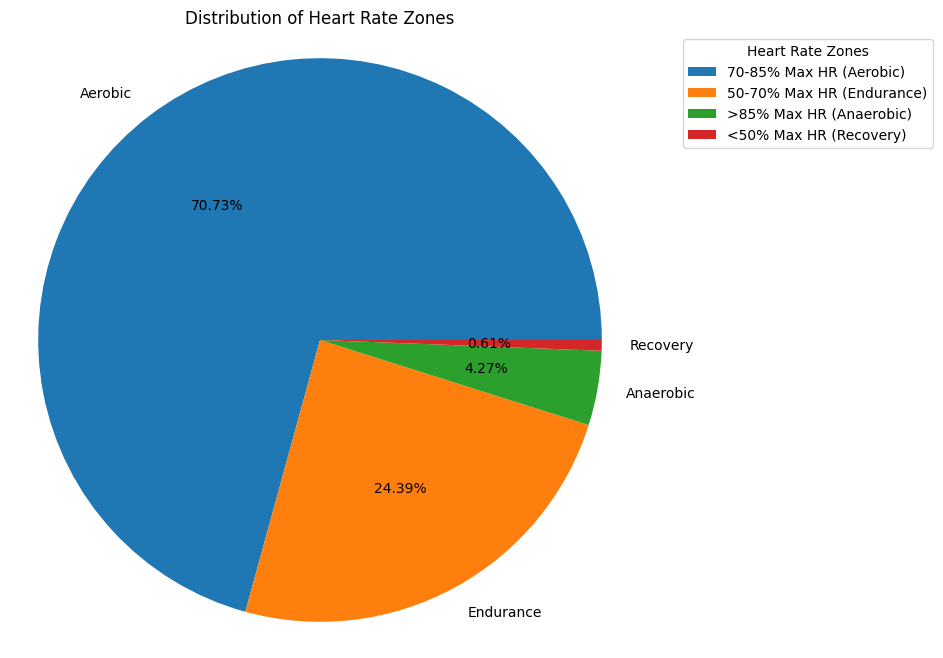

In [12]:
# Count the occurrences of each heart rate zone
zone_counts = df_run['HeartRate_Zone'].value_counts()

# Define the heart rate zone categories with their percentage ranges
zone_categories =['70-85% Max HR (Aerobic)','50-70% Max HR (Endurance)','>85% Max HR (Anaerobic)',
    '<50% Max HR (Recovery)']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(zone_counts, labels=zone_counts.index, autopct='%1.2f%%')
plt.title('Distribution of Heart Rate Zones')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# Add legends
plt.legend(zone_categories,title='Heart Rate Zones', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()



*   The distribution of heart rate zones indicates that 70.73% of observations fall within the aerobic zone, 24.39% in the endurance zone, 4.27% in the anaerobic zone, and 0.61% in the recovery zone.

